In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os

In [2]:
folder = 'PPO_tests'

In [3]:
df = pd.read_csv(f'{folder}/PPO_actor0.0003_critic0.009_timestep4000.csv')

In [4]:
def plot_rewards(df):
    rewards = df['Reward']
    rewards_t = torch.tensor(rewards, dtype=torch.float)
    plt.title('PPO Result')
    plt.xlabel('Episode')
    plt.ylabel('Total Rewards')

    plt.scatter(range(len(rewards_t)), rewards_t.numpy(), color="tab:blue", label='Rewards', s=2)

    if len(rewards_t) >= 100:
        means = rewards_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy(), color="tab:orange", label='100-episode average')
    plt.legend()
    plt.show()

PPO_actor0.0001_critic0.001_timestep1000.csv


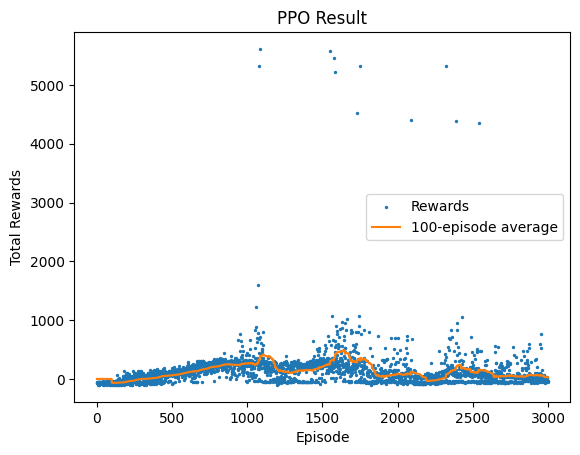

PPO_actor0.0001_critic0.001_timestep4000.csv


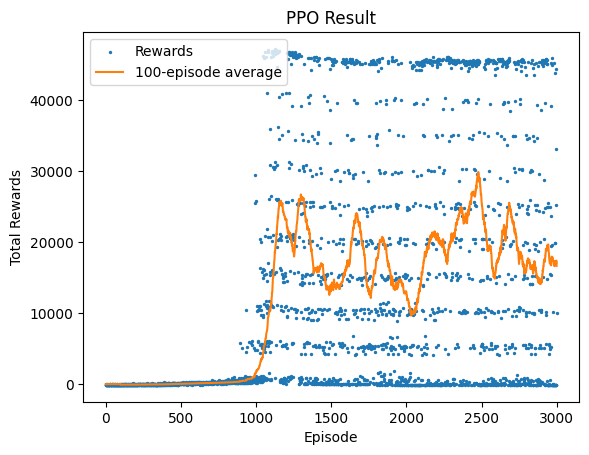

PPO_actor0.0001_critic0.001_timestep9000.csv


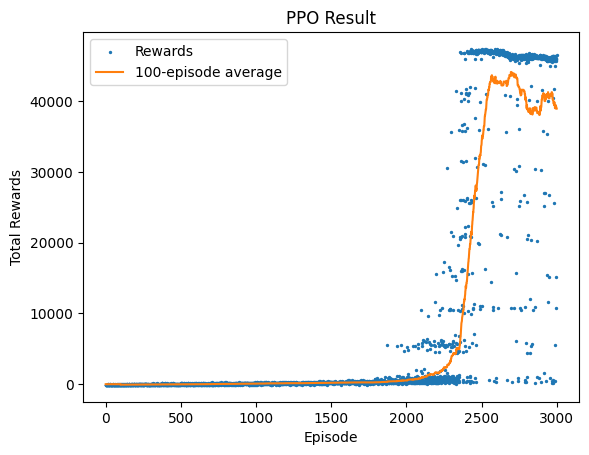

PPO_actor0.0001_critic0.005_timestep1000.csv


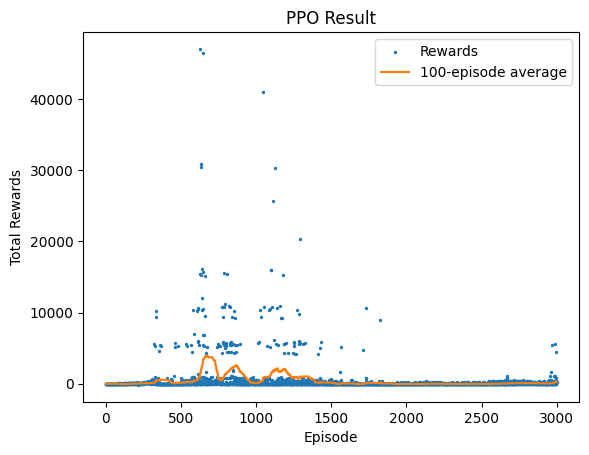

PPO_actor0.0001_critic0.005_timestep4000.csv


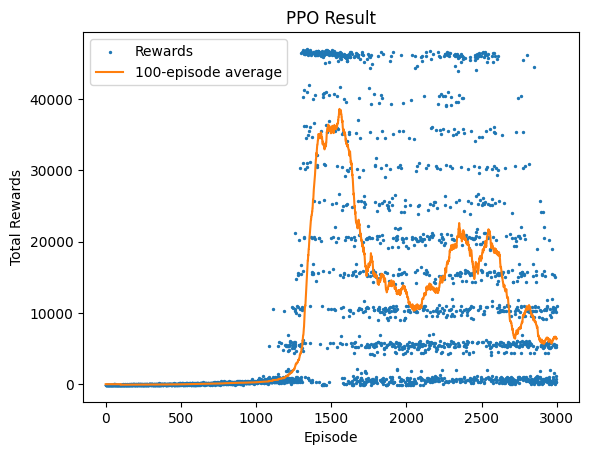

PPO_actor0.0001_critic0.005_timestep9000.csv


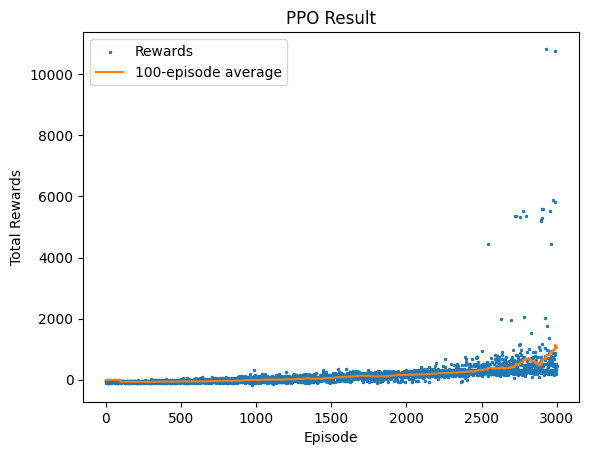

PPO_actor0.0001_critic0.009_timestep1000.csv


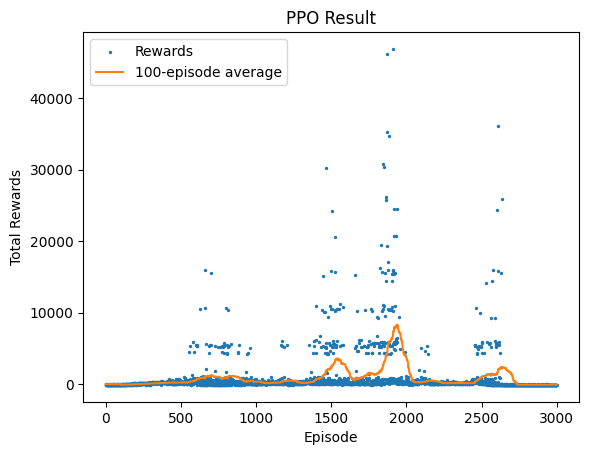

PPO_actor0.0001_critic0.009_timestep4000.csv


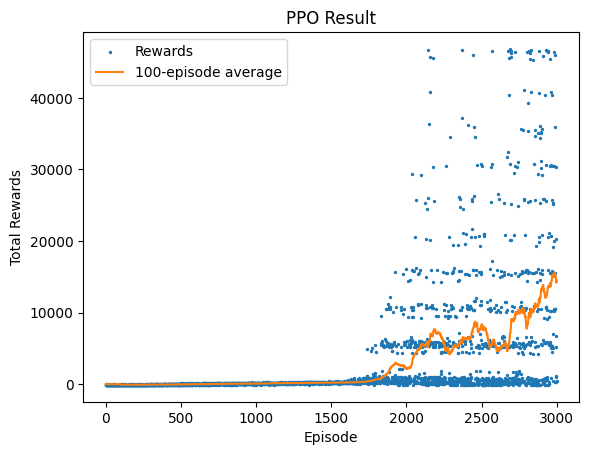

PPO_actor0.0001_critic0.009_timestep9000.csv


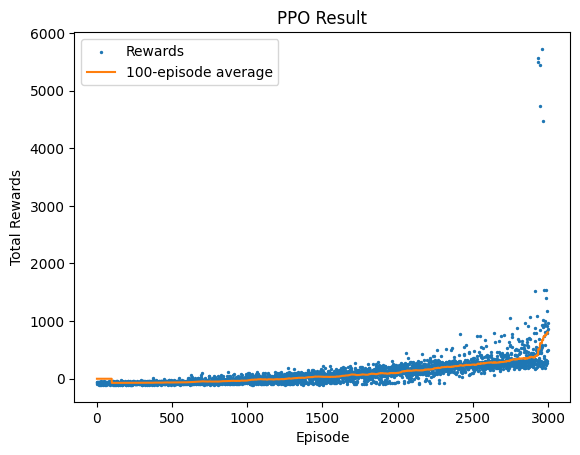

PPO_actor0.0003_critic0.001_timestep1000.csv


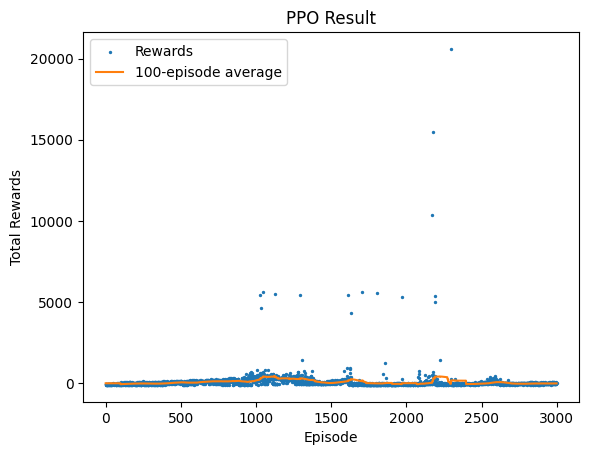

PPO_actor0.0003_critic0.001_timestep4000.csv


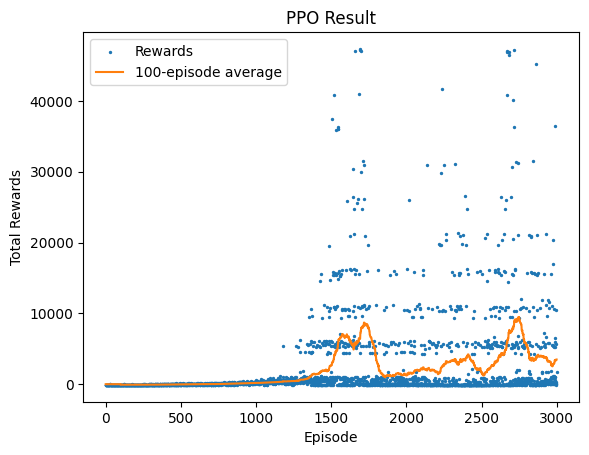

PPO_actor0.0003_critic0.001_timestep9000.csv


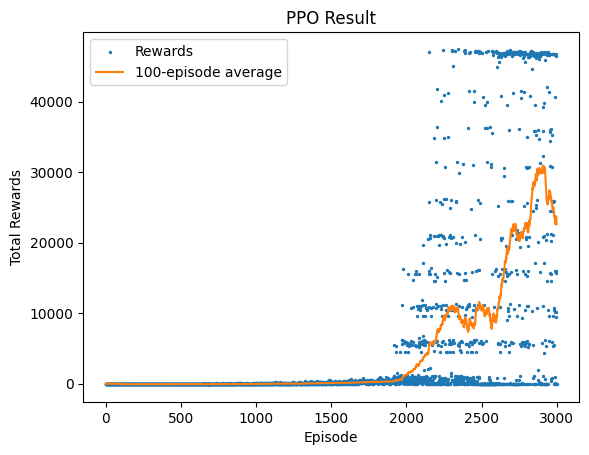

PPO_actor0.0003_critic0.005_timestep1000.csv


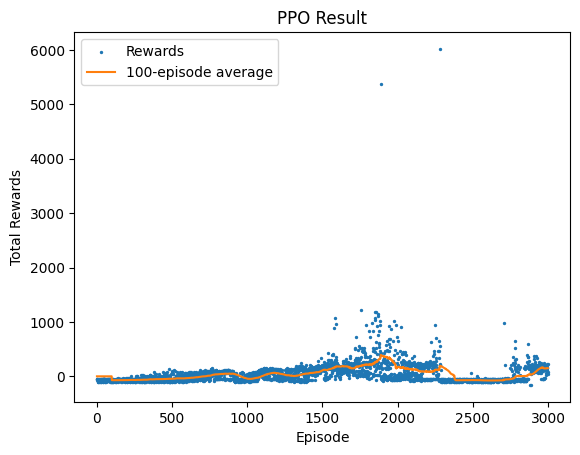

PPO_actor0.0003_critic0.005_timestep4000.csv


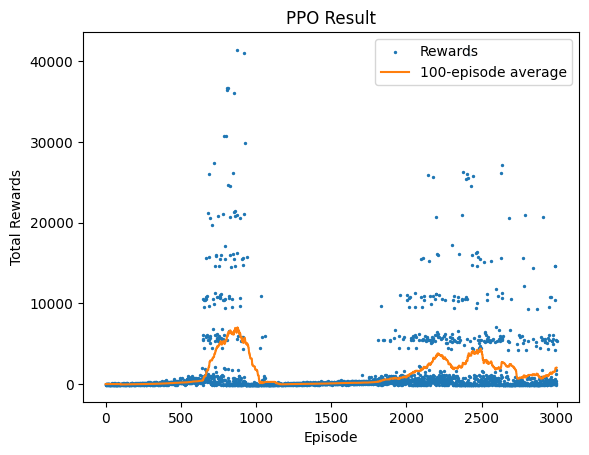

PPO_actor0.0003_critic0.005_timestep9000.csv


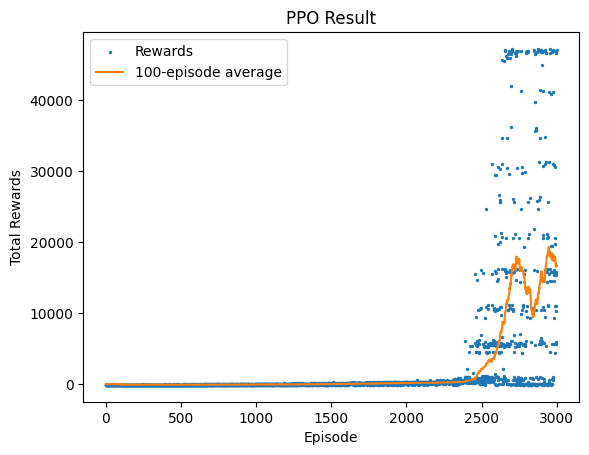

PPO_actor0.0003_critic0.009_timestep1000.csv


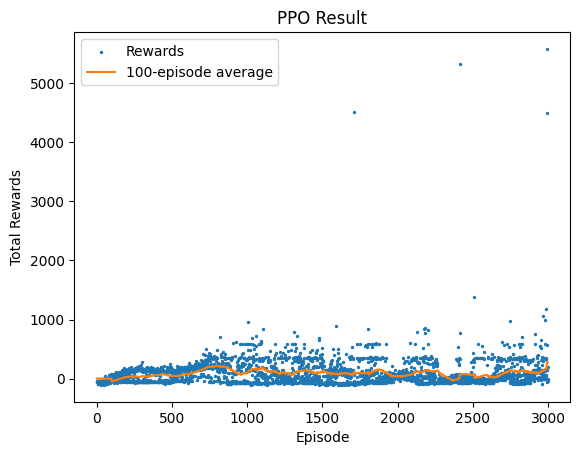

PPO_actor0.0003_critic0.009_timestep4000.csv


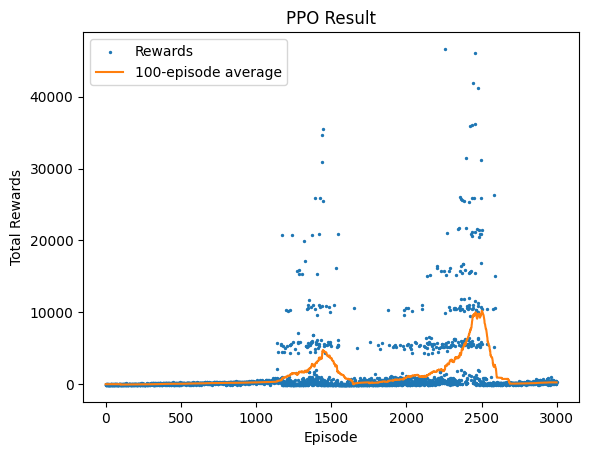

PPO_actor0.0003_critic0.009_timestep9000.csv


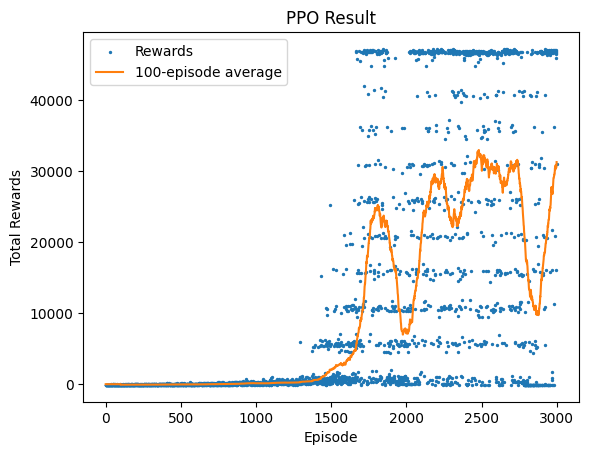

PPO_actor0.0005_critic0.001_timestep1000.csv


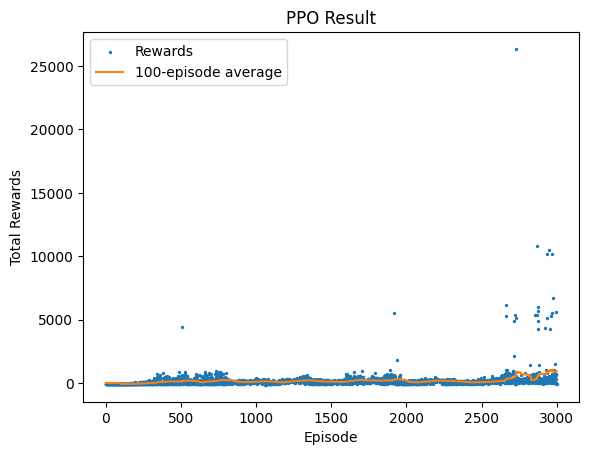

PPO_actor0.0005_critic0.001_timestep4000.csv


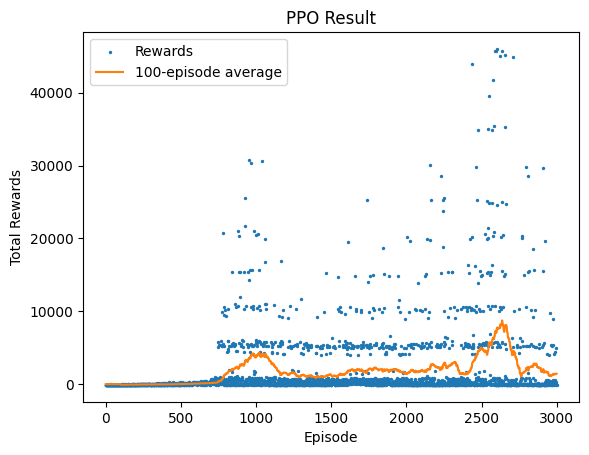

PPO_actor0.0005_critic0.001_timestep9000.csv


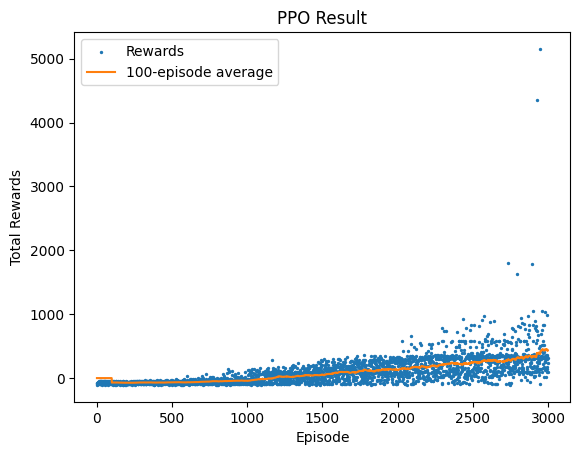

PPO_actor0.0005_critic0.005_timestep1000.csv


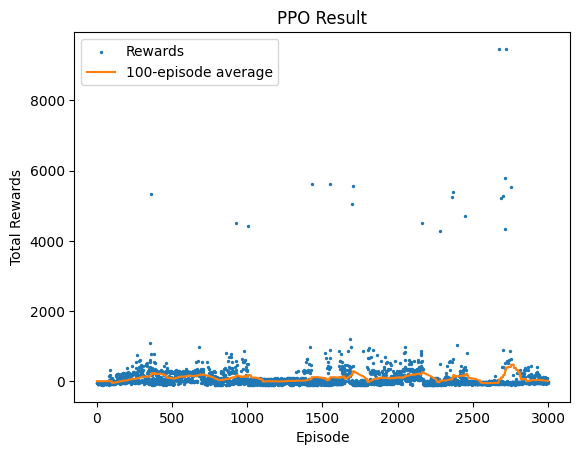

PPO_actor0.0005_critic0.005_timestep4000.csv


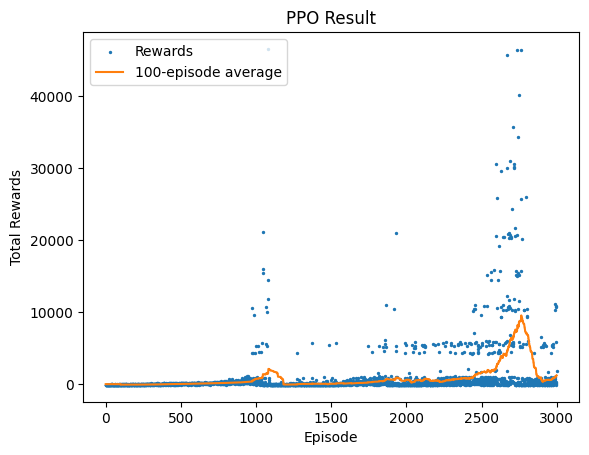

PPO_actor0.0005_critic0.005_timestep9000.csv


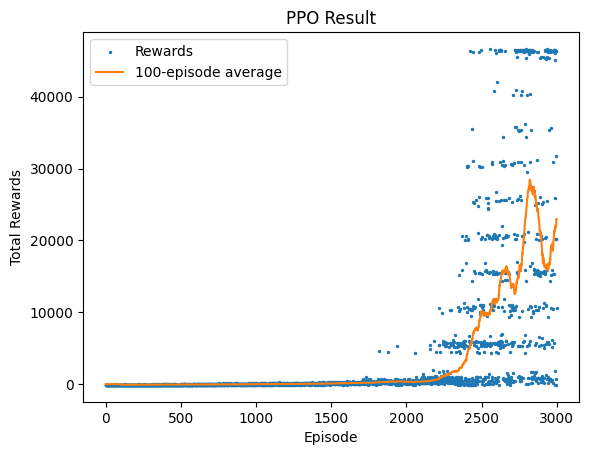

PPO_actor0.0005_critic0.009_timestep1000.csv


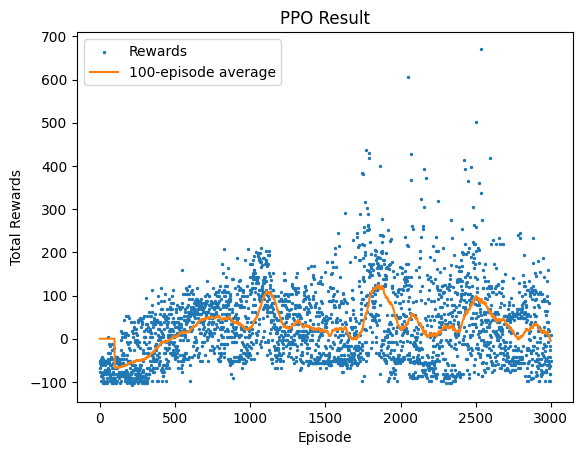

PPO_actor0.0005_critic0.009_timestep4000.csv


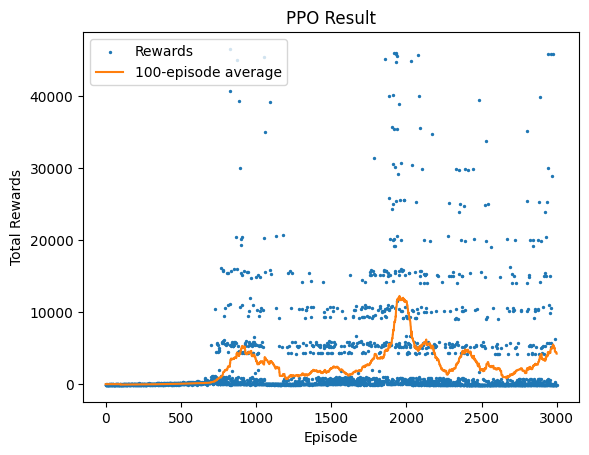

PPO_actor0.0005_critic0.009_timestep9000.csv


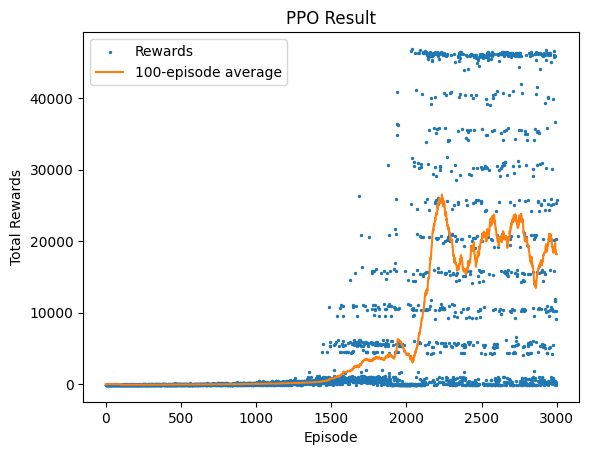

PPO_actor0.001_critic0.001_timestep1000.csv


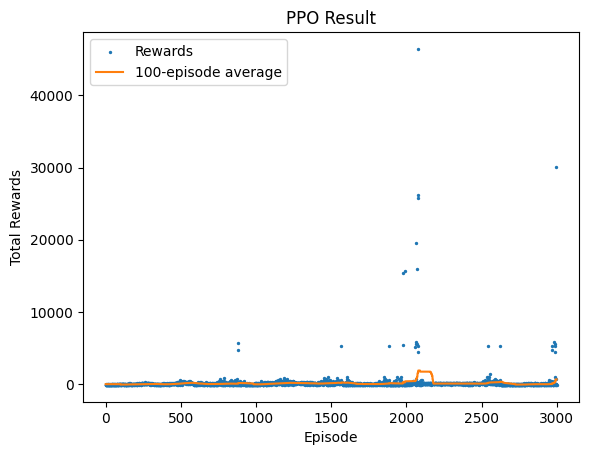

PPO_actor0.001_critic0.001_timestep4000.csv


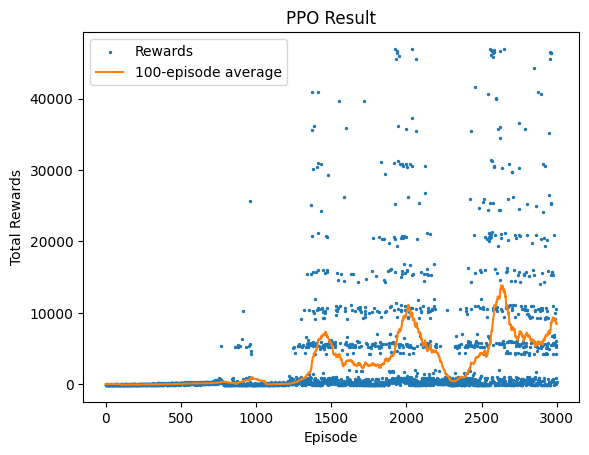

PPO_actor0.001_critic0.001_timestep9000.csv


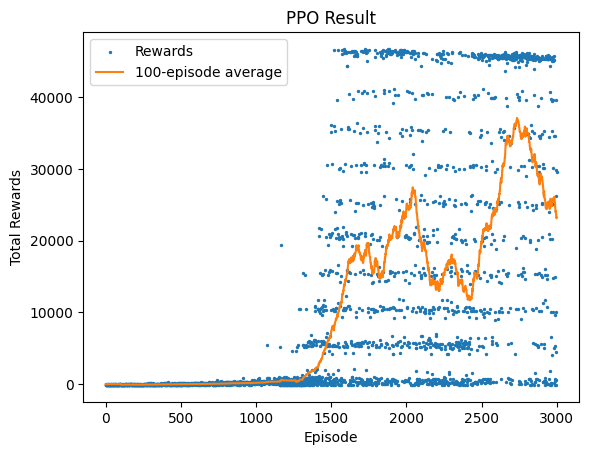

PPO_actor0.001_critic0.005_timestep1000.csv


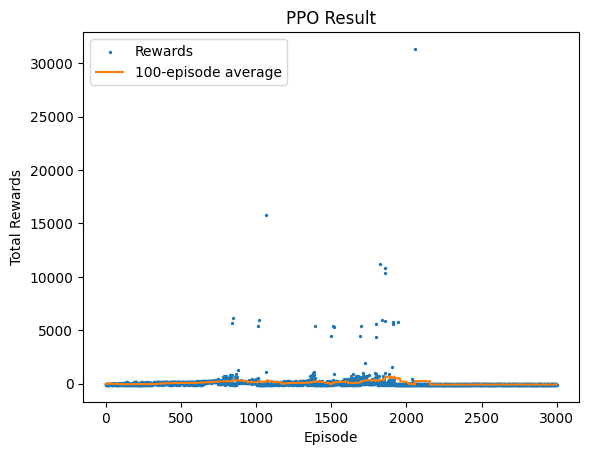

PPO_actor0.001_critic0.005_timestep4000.csv


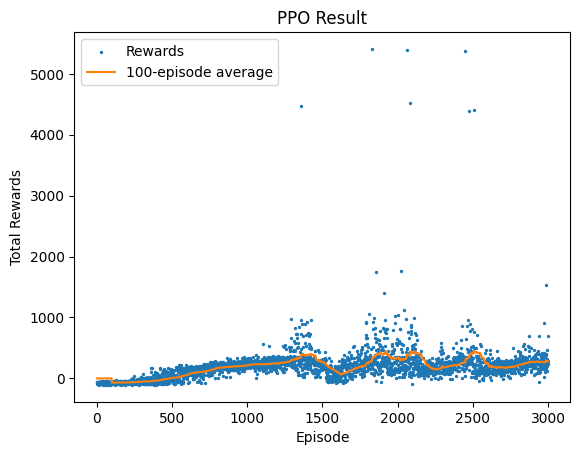

PPO_actor0.001_critic0.005_timestep9000.csv


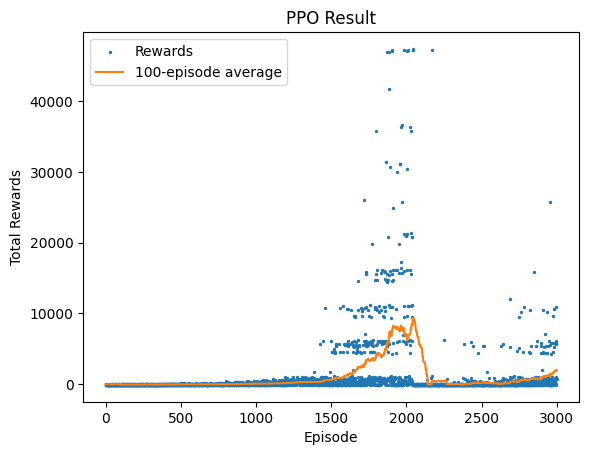

PPO_actor0.001_critic0.009_timestep1000.csv


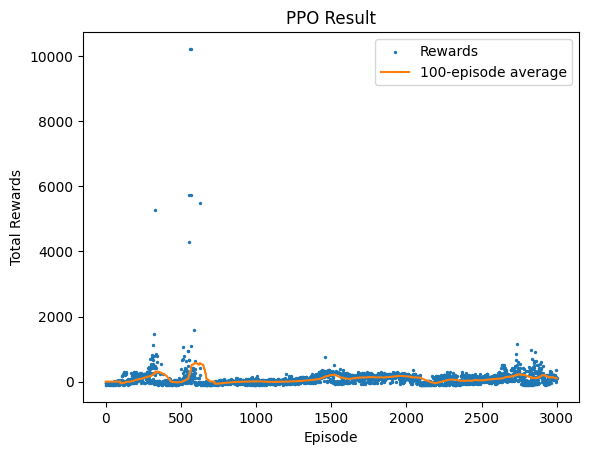

PPO_actor0.001_critic0.009_timestep4000.csv


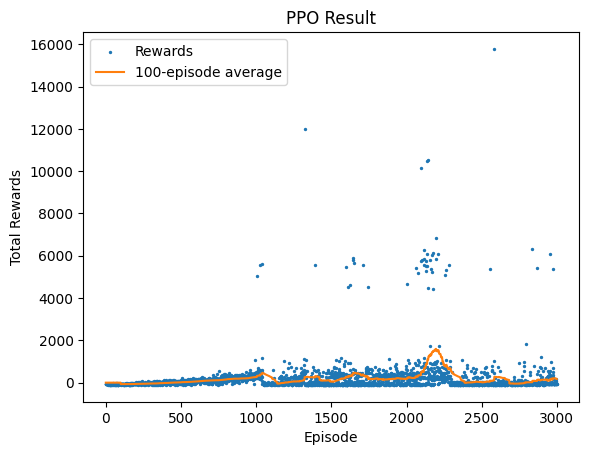

PPO_actor0.001_critic0.009_timestep9000.csv


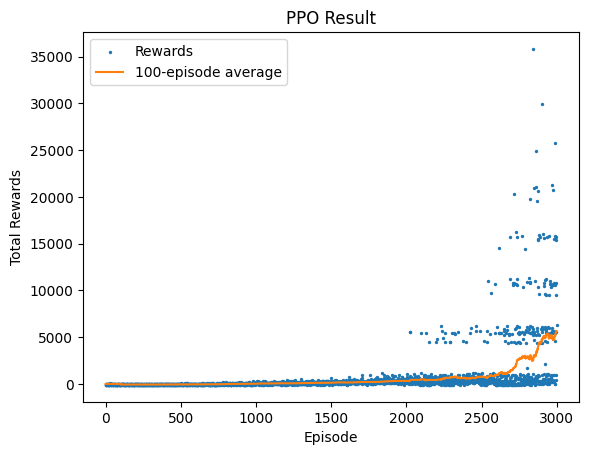

In [4]:
for file in os.listdir(folder):
    if file.startswith('PPO'):
        df = pd.read_csv(f'{folder}/{file}')
        print(file)
        plot_rewards(df)

PPO_actor0.001_critic0.009_timestep9000.csv

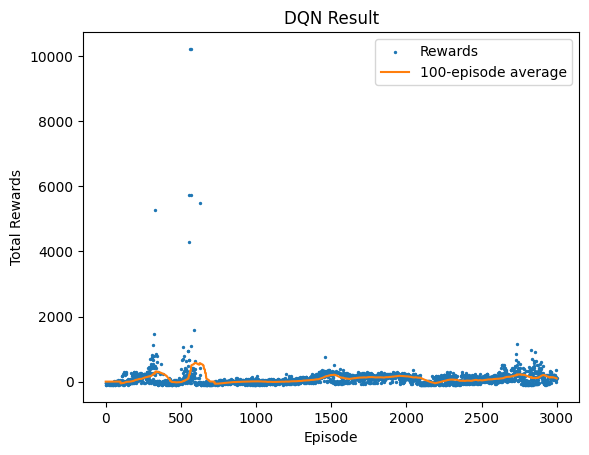

PPO_actor0.001_critic0.009_timestep9000.csv


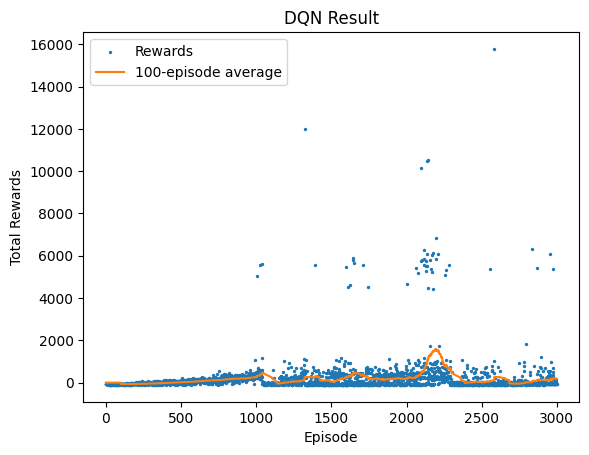

PPO_actor0.001_critic0.009_timestep9000.csv


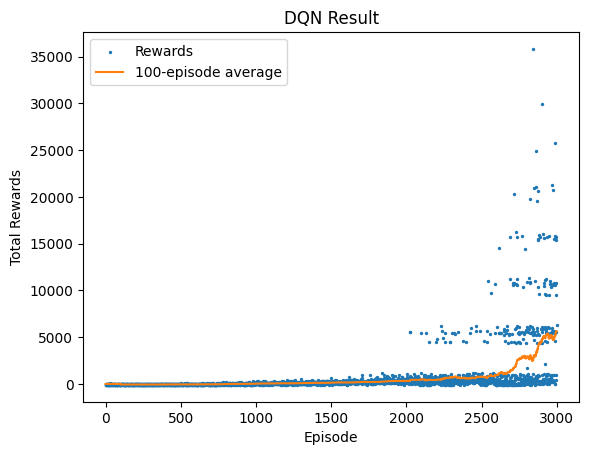

In [12]:
for tmsp in [1000,4000,9000]:
    df = pd.read_csv(f'{folder}/PPO_actor0.001_critic0.009_timestep{tmsp}.csv')
    print(file)
    plot_rewards(df)

In [5]:
# PERFORMANCE METRICS
# get the first row where the reward > 40k
def get_first_top_episode(df):
    try:
        return df[df['Reward'] > 40000]['Episode'].values[0]
    except:
        return 3001

# get number of episodes where the reward > 40k
def get_num_top_episodes(df):
    return len(df[df['Reward'] > 40000])

# average reward (equivalent to total cumulativee reward)
def get_avg_reward(df):
    return df['Reward'].mean()

In [6]:
# STABILITY METRICS
# average moving standard deviation
def average_moving_std(df, window_size):
    '''
    1. Gets the moving standard deviation of the reward over a window of size window_size (recommended 100).
    2. Averages all those moving standard deviations which gives the idea of how unstable the reward was over the training process.
    '''
    moving_std = df['Reward'].rolling(window=window_size).std()
    average_moving_std = moving_std.mean()
    return average_moving_std

# number of episodes where the moving average was at the top
def num_avg_top_episodes(df, window_size):
    '''
    1. Gets the moving average of the reward over a window of size window_size (recommended 100).
    2. Counts the number of times the moving average was at the top (40000).
    '''
    moving_avg = df['Reward'].rolling(window=window_size).mean()
    return len(moving_avg[moving_avg > 35000])

# moving average of the reward drop after peaking
def moving_avg_reward_drop(df, window_size):
    '''
    1. Gets the moving average of the reward over a window of size window_size (recommended 100).
    2. Gets the episode where the moving average peaked.
    3. Gets the percentage drop in the reward after the peak.
    '''
    moving_avg = df['Reward'].rolling(window=window_size).mean()
    peak_episode = moving_avg.idxmax()
    min_after_peak = moving_avg[peak_episode:].min()
    percentage_drop = (moving_avg[peak_episode] - min_after_peak) / moving_avg[peak_episode] * 100
    return percentage_drop

In [7]:
metrics = {
    'lr_actor': [],
    'lr_critic': [],
    'update_time_steps': [],
    'first_top_episode': [],
    'num_top_episodes': [],
    'avg_reward': [],
    'avg_reward_std': [],
    'num_avg_top_ep': [],
    'rwd_drop': [],
    'model_performance': []
}

for lr_actor in [0.0001,0.0003,0.0005,0.001]:
    for lr_critic in [0.001, 0.005, 0.009]:
        for update_time_step in [1000, 4000, 9000]:
            df = pd.read_csv(f'{folder}/PPO_actor{lr_actor}_critic{lr_critic}_timestep{update_time_step}.csv')
            metrics['lr_actor'].append(lr_actor)
            metrics['lr_critic'].append(lr_critic)
            metrics['update_time_steps'].append(update_time_step)
            metrics['first_top_episode'].append(get_first_top_episode(df))
            metrics['num_top_episodes'].append(get_num_top_episodes(df))
            metrics['avg_reward'].append(get_avg_reward(df))
            metrics['avg_reward_std'].append(average_moving_std(df,100))
            metrics['num_avg_top_ep'].append(num_avg_top_episodes(df,100))
            metrics['rwd_drop'].append(moving_avg_reward_drop(df,100))

            df_tests = pd.read_csv(f'PPO_models_test/PPO_FlappyBird_actor{lr_actor}_critic{lr_critic}_tmsp{update_time_step}.csv')
            metrics['model_performance'].append(df_tests['score'].mean())

metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(f'{folder}/metrics.csv')

In [8]:
metrics_df[metrics_df['lr_actor'] == 0.0001]

,lr_actor,lr_critic,update_time_steps,first_top_episode,num_top_episodes,avg_reward,avg_reward_std,num_avg_top_ep,rwd_drop,model_performance
0,0.0001,0.001,1000,3001,0,129.825667,233.307580,0,107.202745,2.40
1,0.0001,0.001,4000,1047,452,12287.965333,11621.653661,0,52.832753,35.52
2,0.0001,0.001,9000,2333,487,8720.615333,3403.069448,495,13.784590,32.64
3,0.0001,0.005,1000,630,3,432.527000,1342.382346,0,101.702094,11.52
4,0.0001,0.005,4000,1303,314,10048.688333,8207.657795,128,85.335665,35.86
5,0.0001,0.005,9000,3001,0,151.911000,181.938795,0,9.217290,2.18
6,0.0001,0.009,1000,1875,2,903.918667,1788.046818,0,100.941666,12.16
7,0.0001,0.009,4000,2146,36,2919.580000,3631.361001,0,9.035744,21.82
8,0.0001,0.009,9000,3001,0,97.298000,92.242298,0,0.000000,1.52


In [9]:
metrics_df = pd.read_csv('PPO_tests/metrics.csv', index_col=0)

In [10]:
metrics_df.groupby('lr_actor').mean()

,lr_critic,update_time_steps,first_top_episode,num_top_episodes,avg_reward,avg_reward_std,num_avg_top_ep,rwd_drop,model_performance
lr_actor,,,,,,,,,
0.0001,0.005,4666.666667,2037.444444,143.777778,3965.814370,3389.073305,69.222222,53.339172,17.291111
0.0003,0.005,4666.666667,2234.333333,81.777778,2541.593667,2749.090056,0.000000,68.711518,8.302222
0.0005,0.005,4666.666667,2301.888889,40.888889,1790.250185,2314.316732,0.000000,66.715283,6.033333
0.0010,0.005,4666.666667,2426.888889,50.777778,1851.911111,2039.842706,7.888889,76.835933,7.717778


In [11]:
metrics_df.groupby('lr_critic').mean()

,lr_actor,update_time_steps,first_top_episode,num_top_episodes,avg_reward,avg_reward_std,num_avg_top_ep,rwd_drop,model_performance
lr_critic,,,,,,,,,
0.001,0.000475,4666.666667,2204.833333,133.250000,3727.071861,3537.350192,47.166667,58.460430,12.630000
0.005,0.000475,4666.666667,2152.333333,42.833333,1693.586917,1906.672821,10.666667,78.902445,9.480000
0.009,0.000475,4666.666667,2393.250000,61.833333,2191.518222,2425.219086,0.000000,61.838555,7.398333


In [12]:
metrics_df.groupby('update_time_steps').mean()

,lr_actor,lr_critic,first_top_episode,num_top_episodes,avg_reward,avg_reward_std,num_avg_top_ep,rwd_drop,model_performance
update_time_steps,,,,,,,,,
1000,0.000475,0.005,2632.416667,0.500000,194.260500,491.261874,0.000000,91.172031,3.386667
4000,0.000475,0.005,1739.083333,73.750000,3219.082444,3956.385505,10.666667,77.076592,12.740000
9000,0.000475,0.005,2378.916667,163.666667,4198.834056,3421.594720,47.166667,30.952807,13.381667
